# Metal Surface Defects Inspection

## About the dataset

This dataset was downloaded from NEU Metal Surface Defects Databse which contains six kinds of typical surface defects of the hot-rolled steel strip are collected, i.e., rolled-in scale (RS), patches (Pa), crazing (Cr), pitted surface (PS), inclusion (In) and scratches (Sc). The database includes 1,800 grayscale images: 300 samples each of six different kinds of typical surface defects.

But for this analysis, the dataset divided into 3 directories. The training directory contains 276 images of each class from the 300 images. The rest 24 images of each class also divided into tests and valid datasets.

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
train_dir = 'NEU Metal Surface Defects Data/train'
val_dir = 'NEU Metal Surface Defects Data/valid'
test_dir='NEU Metal Surface Defects Data/test'
print("Path Direcorty: ",os.listdir("NEU Metal Surface Defects Data"))
print("Train Direcorty: ",os.listdir("NEU Metal Surface Defects Data/train"))
print("Test Direcorty: ",os.listdir("NEU Metal Surface Defects Data/test"))
print("Validation Direcorty: ",os.listdir("NEU Metal Surface Defects Data/valid"))

Path Direcorty:  ['test', 'Thumbs.db', 'train', 'valid']
Train Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Test Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Validation Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


### Here, you can see the dataset distribution for 'Inclusion' surface defect. Rest of the dataset also follow the same distribution

In [3]:
print("Training Inclusion data:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Inclusion data:",len(os.listdir(val_dir+'/'+'Inclusion')))

Training Inclusion data: 276
Testing Inclusion data: 12
Validation Inclusion data: 12


## Understanding of each category

---

### 1. **Inclusion**
- **Description**: Non-metallic materials (like oxides or sulfides) embedded within the steel surface during the manufacturing process. These inclusions create imperfections that reduce the metal’s strength and impact resistance.

---

### 2. **Rolled-in Scale**
- **Description**: Occurs when the oxide layer (scale) formed on the metal surface during heating is not removed before rolling. As a result, this scale gets pressed into the surface, creating streaks or spots that affect the metal’s finish.

---

### 3. **Pitted Surface**
- **Description**: Small depressions or cavities formed on the metal surface due to trapped gas or foreign particles during the casting process. These pits reduce the smoothness of the surface and can weaken the metal.

---

### 4. **Scratches**
- **Description**: Linear marks or streaks caused by mechanical friction, handling, or surface contact during the manufacturing process. These scratches affect the appearance and can compromise the integrity of the steel surface.

---

### 5. **Patches**
- **Description**: Uneven areas on the steel surface, often caused by inconsistent heating, cooling, or pressure during production. Patches are typically visible as blotches or discolored regions.

---

### 6. **Crazing**
- **Description**: A network of fine cracks that appear on the steel surface due to high tensile stresses during cooling or rolling. These cracks weaken the material’s overall structure and can lead to further damage.

---

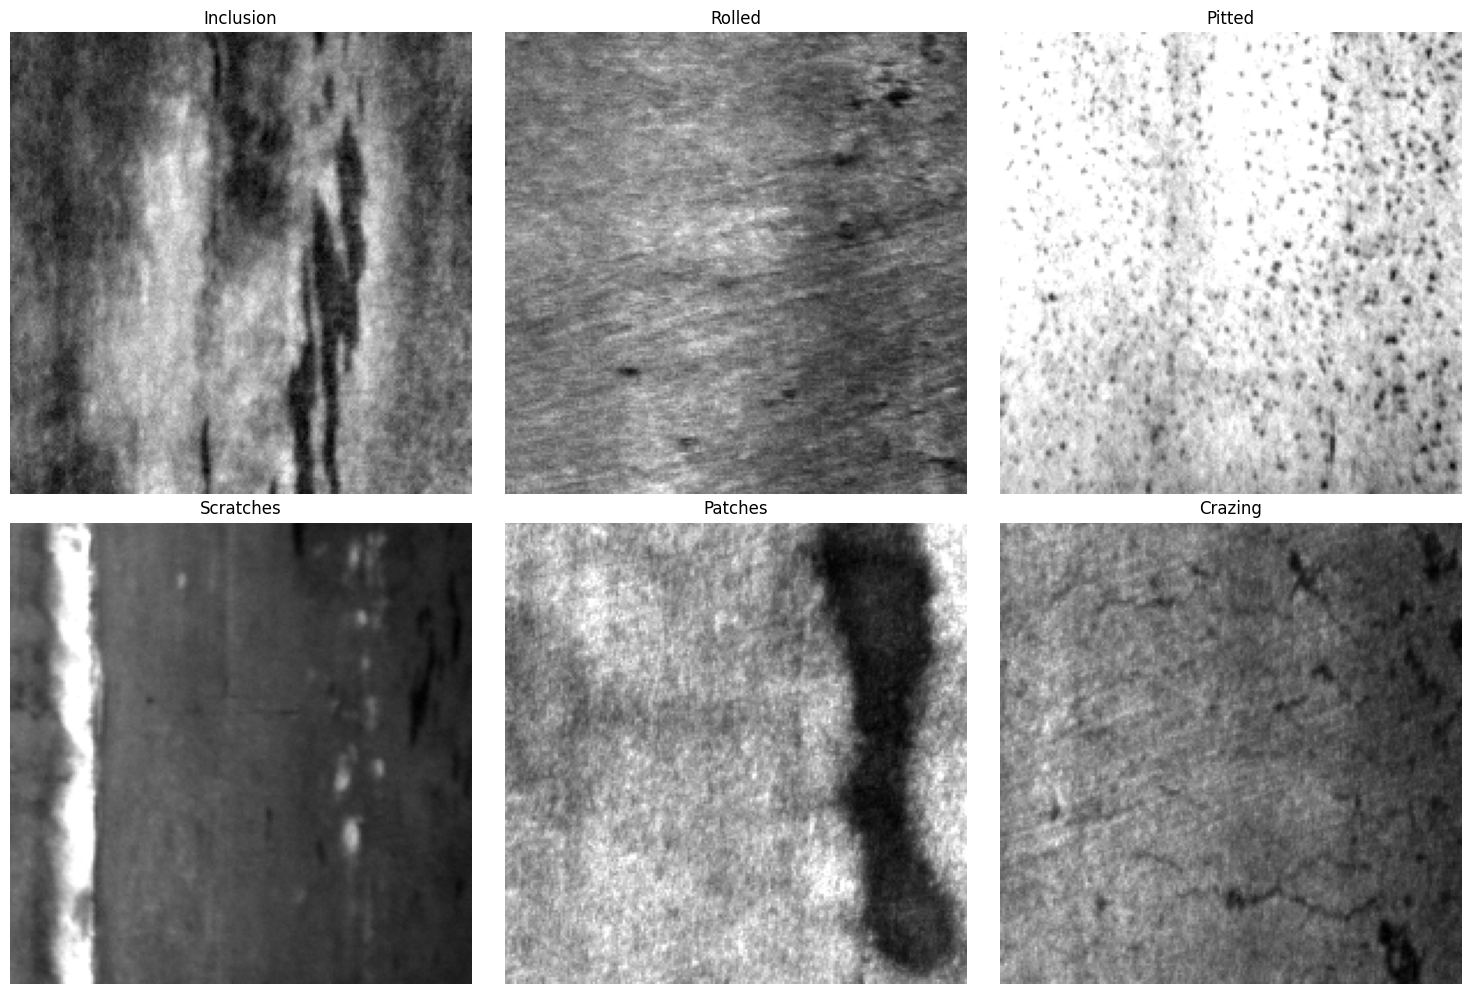

In [4]:
import os
import matplotlib.pyplot as plt
import cv2

# Define categories and paths
categories = ['Inclusion', 'Rolled', 'Pitted', 'Scratches', 'Patches', 'Crazing']
train_dir = 'NEU Metal Surface Defects Data/train'

# Create a figure for side-by-side images
plt.figure(figsize=(15, 10))

# Loop through each category
for i, category in enumerate(categories):
    # Get the first image file in the category folder
    category_path = os.path.join(train_dir, category)
    image_file = os.listdir(category_path)[1]  # Get the first image
    image_path = os.path.join(category_path, image_file)
    
    # Load and display the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Display the image in the subplot
    plt.subplot(2, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(category)
    plt.axis('off')

# Show the figure
plt.tight_layout()
plt.show()


### Image Preprocessing techniques which can be used for various metal defects
* Inclusion: Edge Detection, CLAHE, Dilation
* Rolled: Gaussian Blur, Edge Detection, Histogram Equalization
* Pitted: Gaussian Blur, Adaptive Thresholding, Erosion
* Scratches: Edge Detection, Sharpening, Gaussian Blur
* Patches: CLAHE, Gaussian Noise, Intensity Normalization
* Crazing: Edge Detection, Elastic Transformations, Sharpening

### Why These Techniques Work:
* Inclusions and Pitting benefit from contrast enhancement and edge detection to highlight their irregular shapes.
* Rolled and Scratches defects are linear features that edge detection and sharpening can highlight effectively.
* Patches require intensity-based techniques like histogram equalization and normalization to capture the subtle differences in texture.
* Crazing involves very fine patterns, so a combination of edge detection and sharpening will enhance these details.

## Pre-processing the data

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [6]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


## Custom CNN model building

### Early Stopping is applied so that resources can be saved and overfitting can be avoided

In [7]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 199, 199, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 98, 98, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

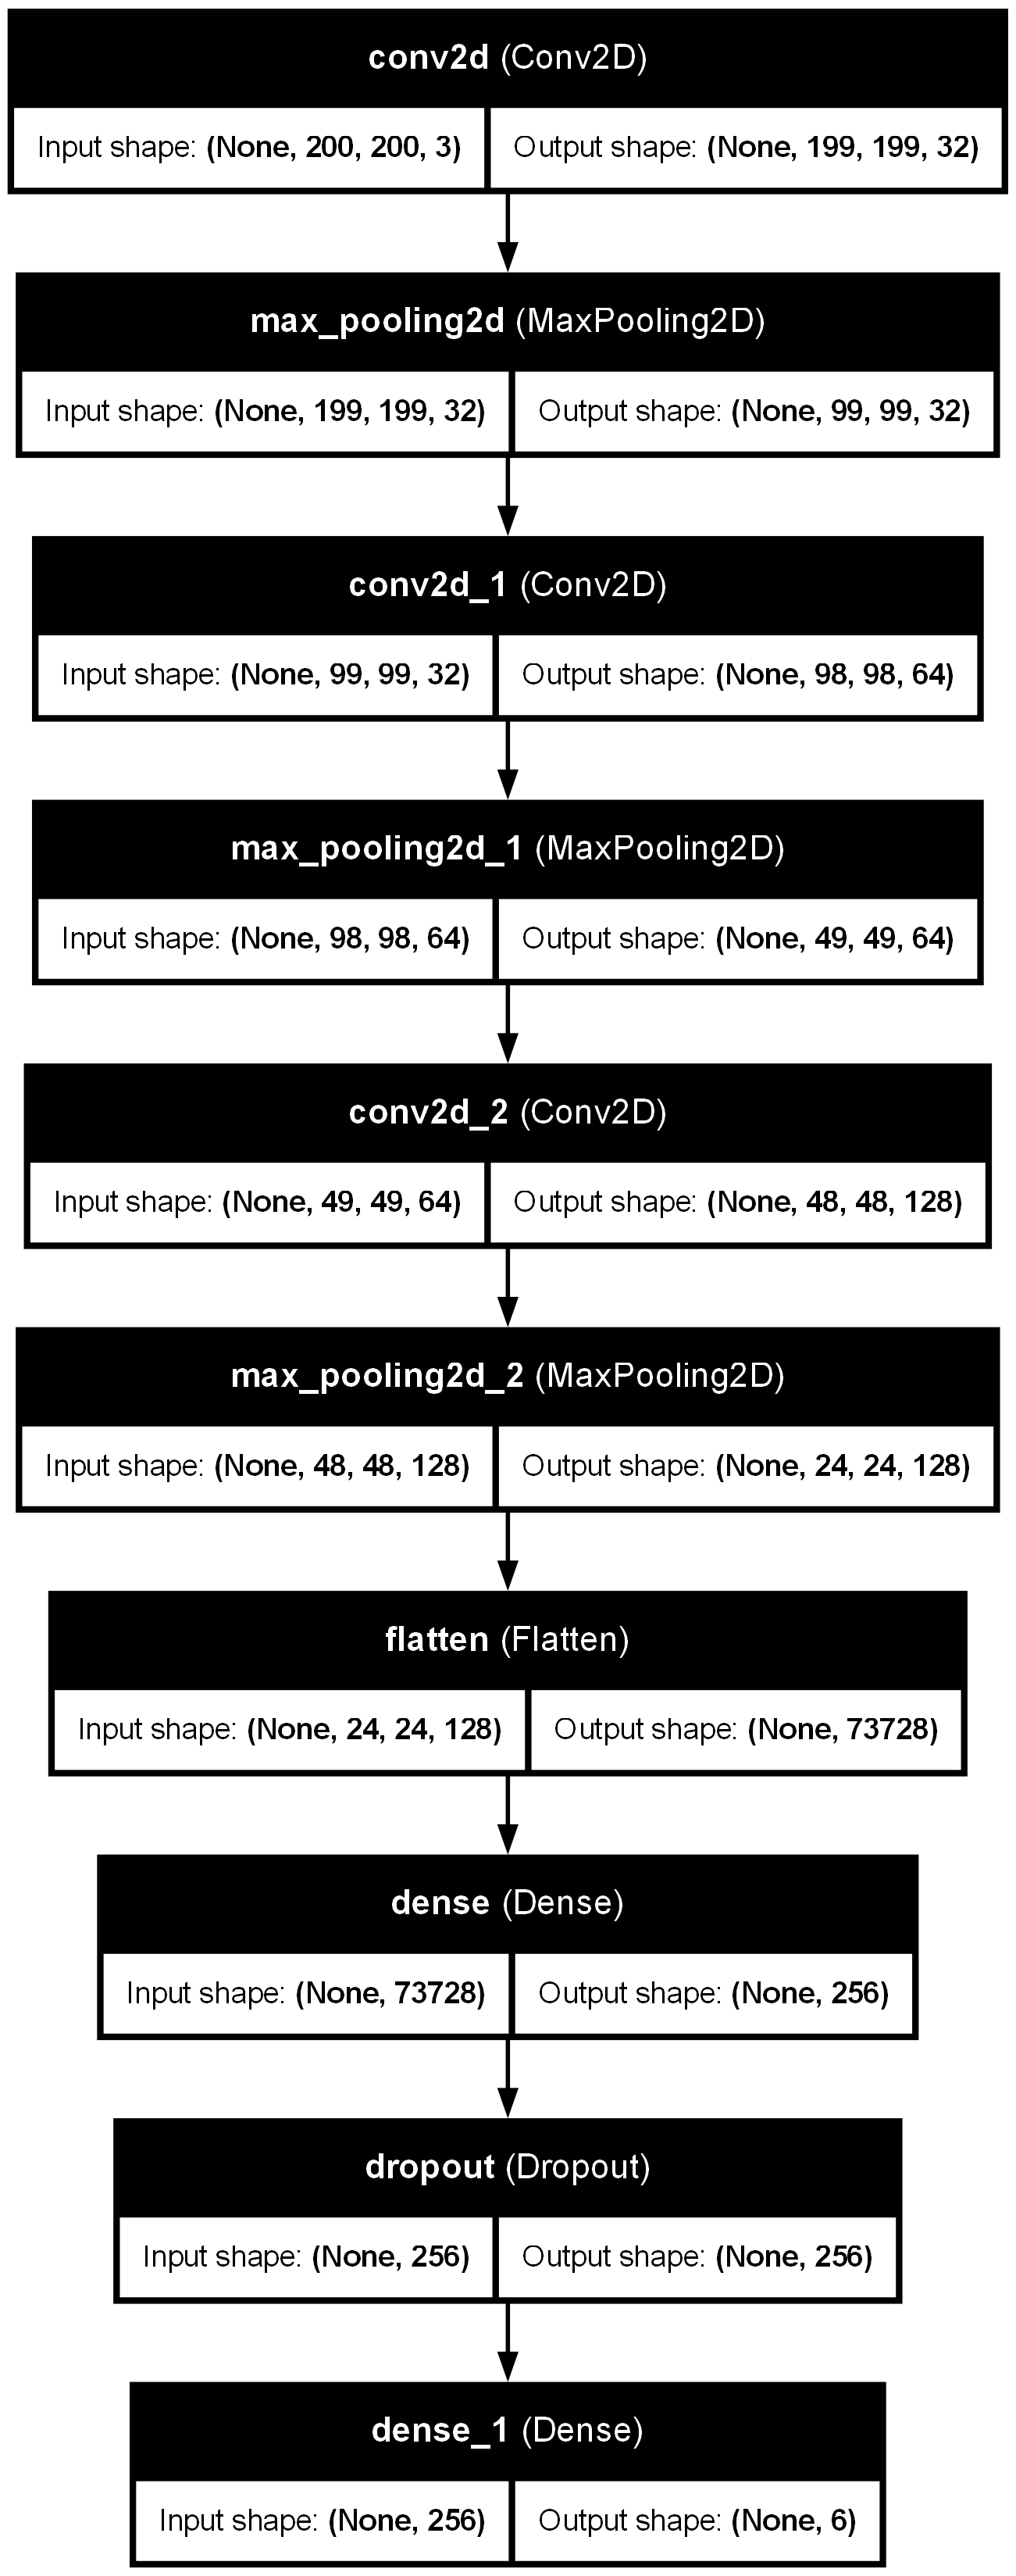

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# param_grid = {
#     'optimizer': ['rmsprop', 'adam'],
#     'dropout_rate': [0.2, 0.5],
#     'batch_size': [16, 32],
#     'epochs': [10, 20]
# }

# grid = GridSearchCV(estimator=KerasClassifierWrapper(), param_grid=param_grid, cv=3, n_jobs=-1)
# grid.fit(train_generator, validation_data=validation_generator, callbacks=[early_stopping])

# Initialize the dictionary to store the training history of each model
histories = {}

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [11]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=30,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.1979 - loss: 2.0347

C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - accuracy: 0.2415 - loss: 1.7914 - val_accuracy: 0.3333 - val_loss: 1.5375
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.3720 - loss: 1.4912 - val_accuracy: 0.5556 - val_loss: 1.3117
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 232ms/step - accuracy: 0.4752 - loss: 1.3390 - val_accuracy: 0.7222 - val_loss: 0.9928
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.5773 - loss: 1.1189 - val_accuracy: 0.8194 - val_loss: 0.7277
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.6950 - loss: 0.8451 - val_accuracy: 0.9444 - val_loss: 0.3332
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.7832 - loss: 0.6268 - val_accuracy: 0.9861 - val_loss: 0.1616
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 236ms/step - accuracy: 0.8104 - loss: 0.5758 - val_accuracy: 0.8889 - val_loss: 0.4524
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.8436 - loss: 0.4484 - val

In [12]:
model_name = "Custom Model"
# Save the model history for plotting
histories[model_name] = history

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"{model_name} Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"{model_name} Validation Loss: {val_loss:.4f}\n")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0080
Custom Model Validation Accuracy: 100.00%
Custom Model Validation Loss: 0.0080



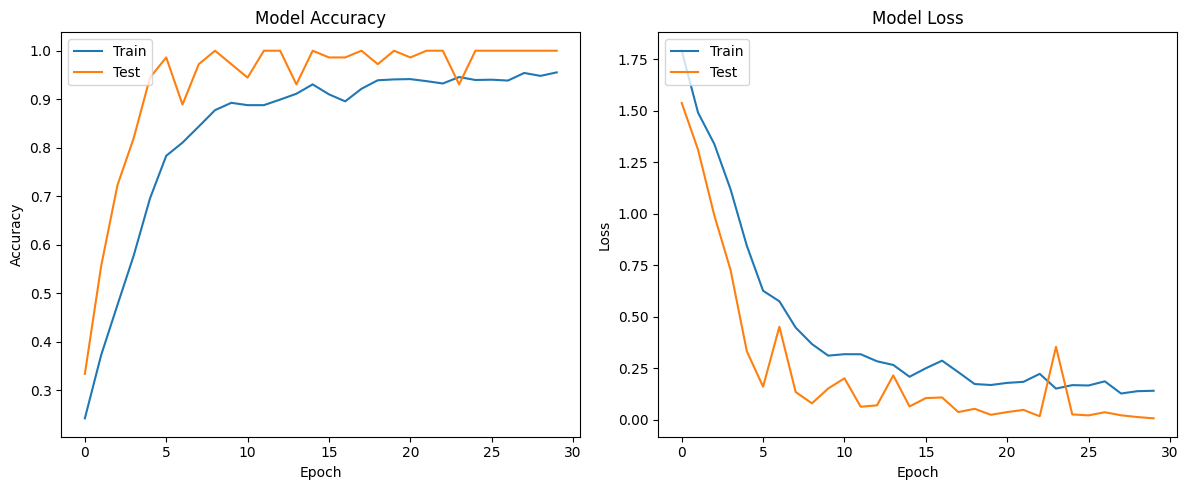

In [13]:
import matplotlib.pyplot as plt 

# Create a figure for side-by-side plots
plt.figure(figsize=(12, 5))  # Adjust the size of the figure as needed

# Summarize history for accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Summarize history for loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Show the plots
plt.tight_layout()  # Adjust spacing between plots for a cleaner look
plt.show()


In [17]:
# First, we are going to load the file names and their respective target labels into numpy array! 
from sklearn.datasets import load_files
import numpy as np

test_dir = 'NEU Metal Surface Defects Data/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [18]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [19]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, no_of_classes)

In [35]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

TypeError: path should be path-like or io.BytesIO, not <class 'numpy.ndarray'>

In [34]:
model.save("model.keras")

In [21]:
x_test = x_test.astype('float32')/255

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


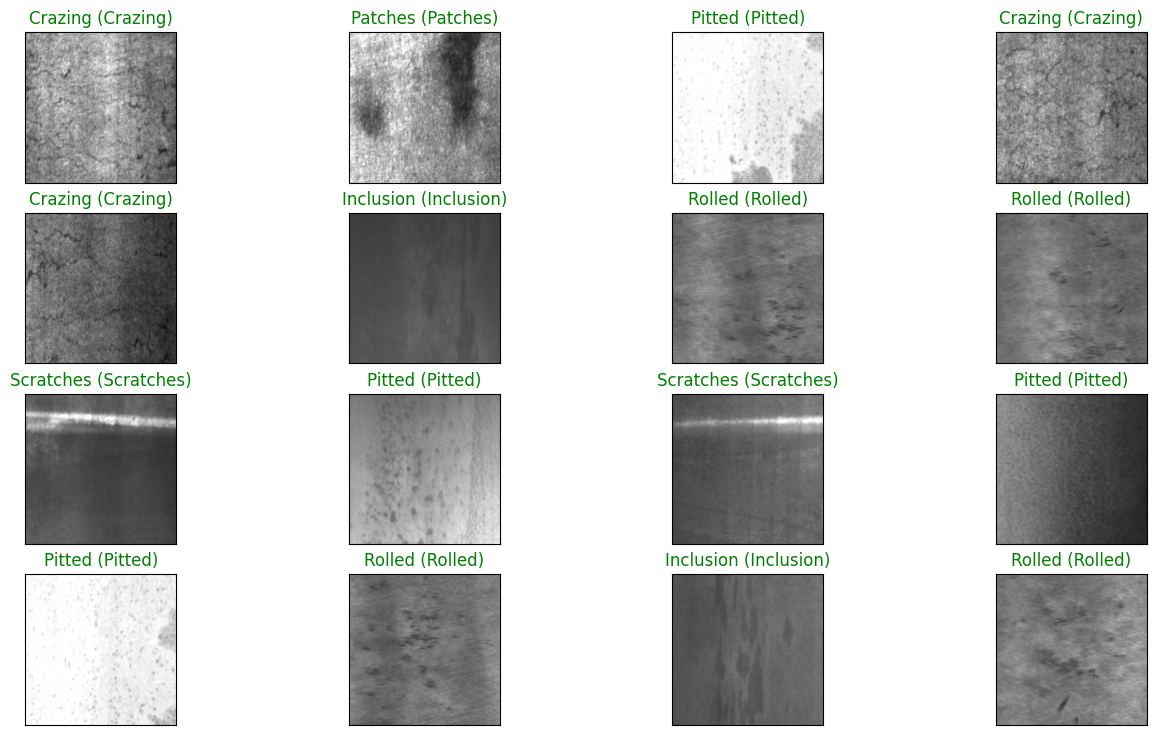

In [22]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))


## Let's Use Transfer Learning Now

### We will apply VGG16 and InceptionV3 on this dataset

### Preprocessing again for input image as we need to increase batch size

In [23]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator with target size 224x224
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Changed to 224x224
    batch_size=32,  # Adjusted batch size for ResNet50
    class_mode='categorical'
)

# Flow validation images in batches of 10 using test_datagen generator with target size 224x224
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Changed to 224x224
    batch_size=32,
    class_mode='categorical'
)


Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [24]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [25]:
def create_model(base_model_name):
    if base_model_name == 'VGG16':
        base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    elif base_model_name == 'InceptionV3':
        base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    else:
        raise ValueError("Base model not recognized. Please use VGG16, ResNet50, or InceptionV3.")

    # Freeze the convolutional base
    base_model.trainable = False

    # Add custom layers on top of the convolutional base
    model = base_model.output
    model = GlobalAveragePooling2D()(model)
    model = Dense(256, activation='relu')(model)
    model = Dropout(0.5)(model)  # Adding some dropout to prevent overfitting
    model = Dense(6, activation='softmax')(model)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=model)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [26]:

base_models = ['VGG16', 'InceptionV3']

for model_name in base_models:
    print(f"Training {model_name} model...")
    model = create_model(model_name)

    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[myCallback()],  # Your callback to stop early if accuracy reaches 98%
        verbose=1
    )

    # Save the model history for plotting
    histories[model_name] = history

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(validation_generator)
    print(f"{model_name} Validation Accuracy: {val_accuracy * 100:.2f}%")
    print(f"{model_name} Validation Loss: {val_loss:.4f}\n")


Training VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.2101 - loss: 1.8753 - val_accuracy: 0.6806 - val_loss: 1.5936
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.3279 - loss: 1.6507 - val_accuracy: 0.7639 - val_loss: 1.4070
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.4330 - loss: 1.4982 - val_accuracy: 0.8056 - val_loss: 1.2460
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.5302 - loss: 1.3512 - val_accuracy: 0.8333 - val_loss: 1.1105
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.6027 - loss: 1.2422 - val_accuracy: 0.8750 - val_loss: 0.9934
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 0.6516 - loss: 1.1453 - val_accuracy: 0.9028 - val_loss: 0.8929
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.7114 - loss: 1.0469 - val_accuracy: 0.9306 - val_loss: 0.8077
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'histories' dictionary containing the training histories for each model
# and 'val_accuracies' dictionary to store final validation accuracies

# Step 1: Create a dictionary to store model names and validation accuracies
val_accuracies = {}

# For each trained model, store the name and final validation accuracy
for model_name, history in histories.items():
    val_accuracy = max(history.history['val_accuracy'])
    val_accuracies[model_name] = val_accuracy

# Step 2: Convert the dictionary into a DataFrame for easier visualization as a table
results_df = pd.DataFrame(list(val_accuracies.items()), columns=['Model Name', 'Validation Accuracy'])

# Display the table in a clean format
print("\nModel Validation Accuracies:")
display(results_df)

# Step 3: Plot the training history for each model

# Function to plot accuracy and loss graphs
def plot_history(history, model_name):
    # Plot Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Loop through each model and plot their history
for model_name, history in histories.items():
    plot_history(history, model_name)
